In [1]:
from plotter import Plotter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
df25_2 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-25_14-58-24\2024-05-25_14-58-24.csv")
df25_1 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-25_14-51-18\2024-05-25_14-51-18.csv")

df25 = pd.concat([df25_1, df25_2])

import json
file_path = r"C:\Users\jordan\Desktop\c104\2024-05-25_14-51-18\params.json"

with open(file_path, 'r') as file:
    params = json.load(file)

plotter= Plotter(params)

c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_

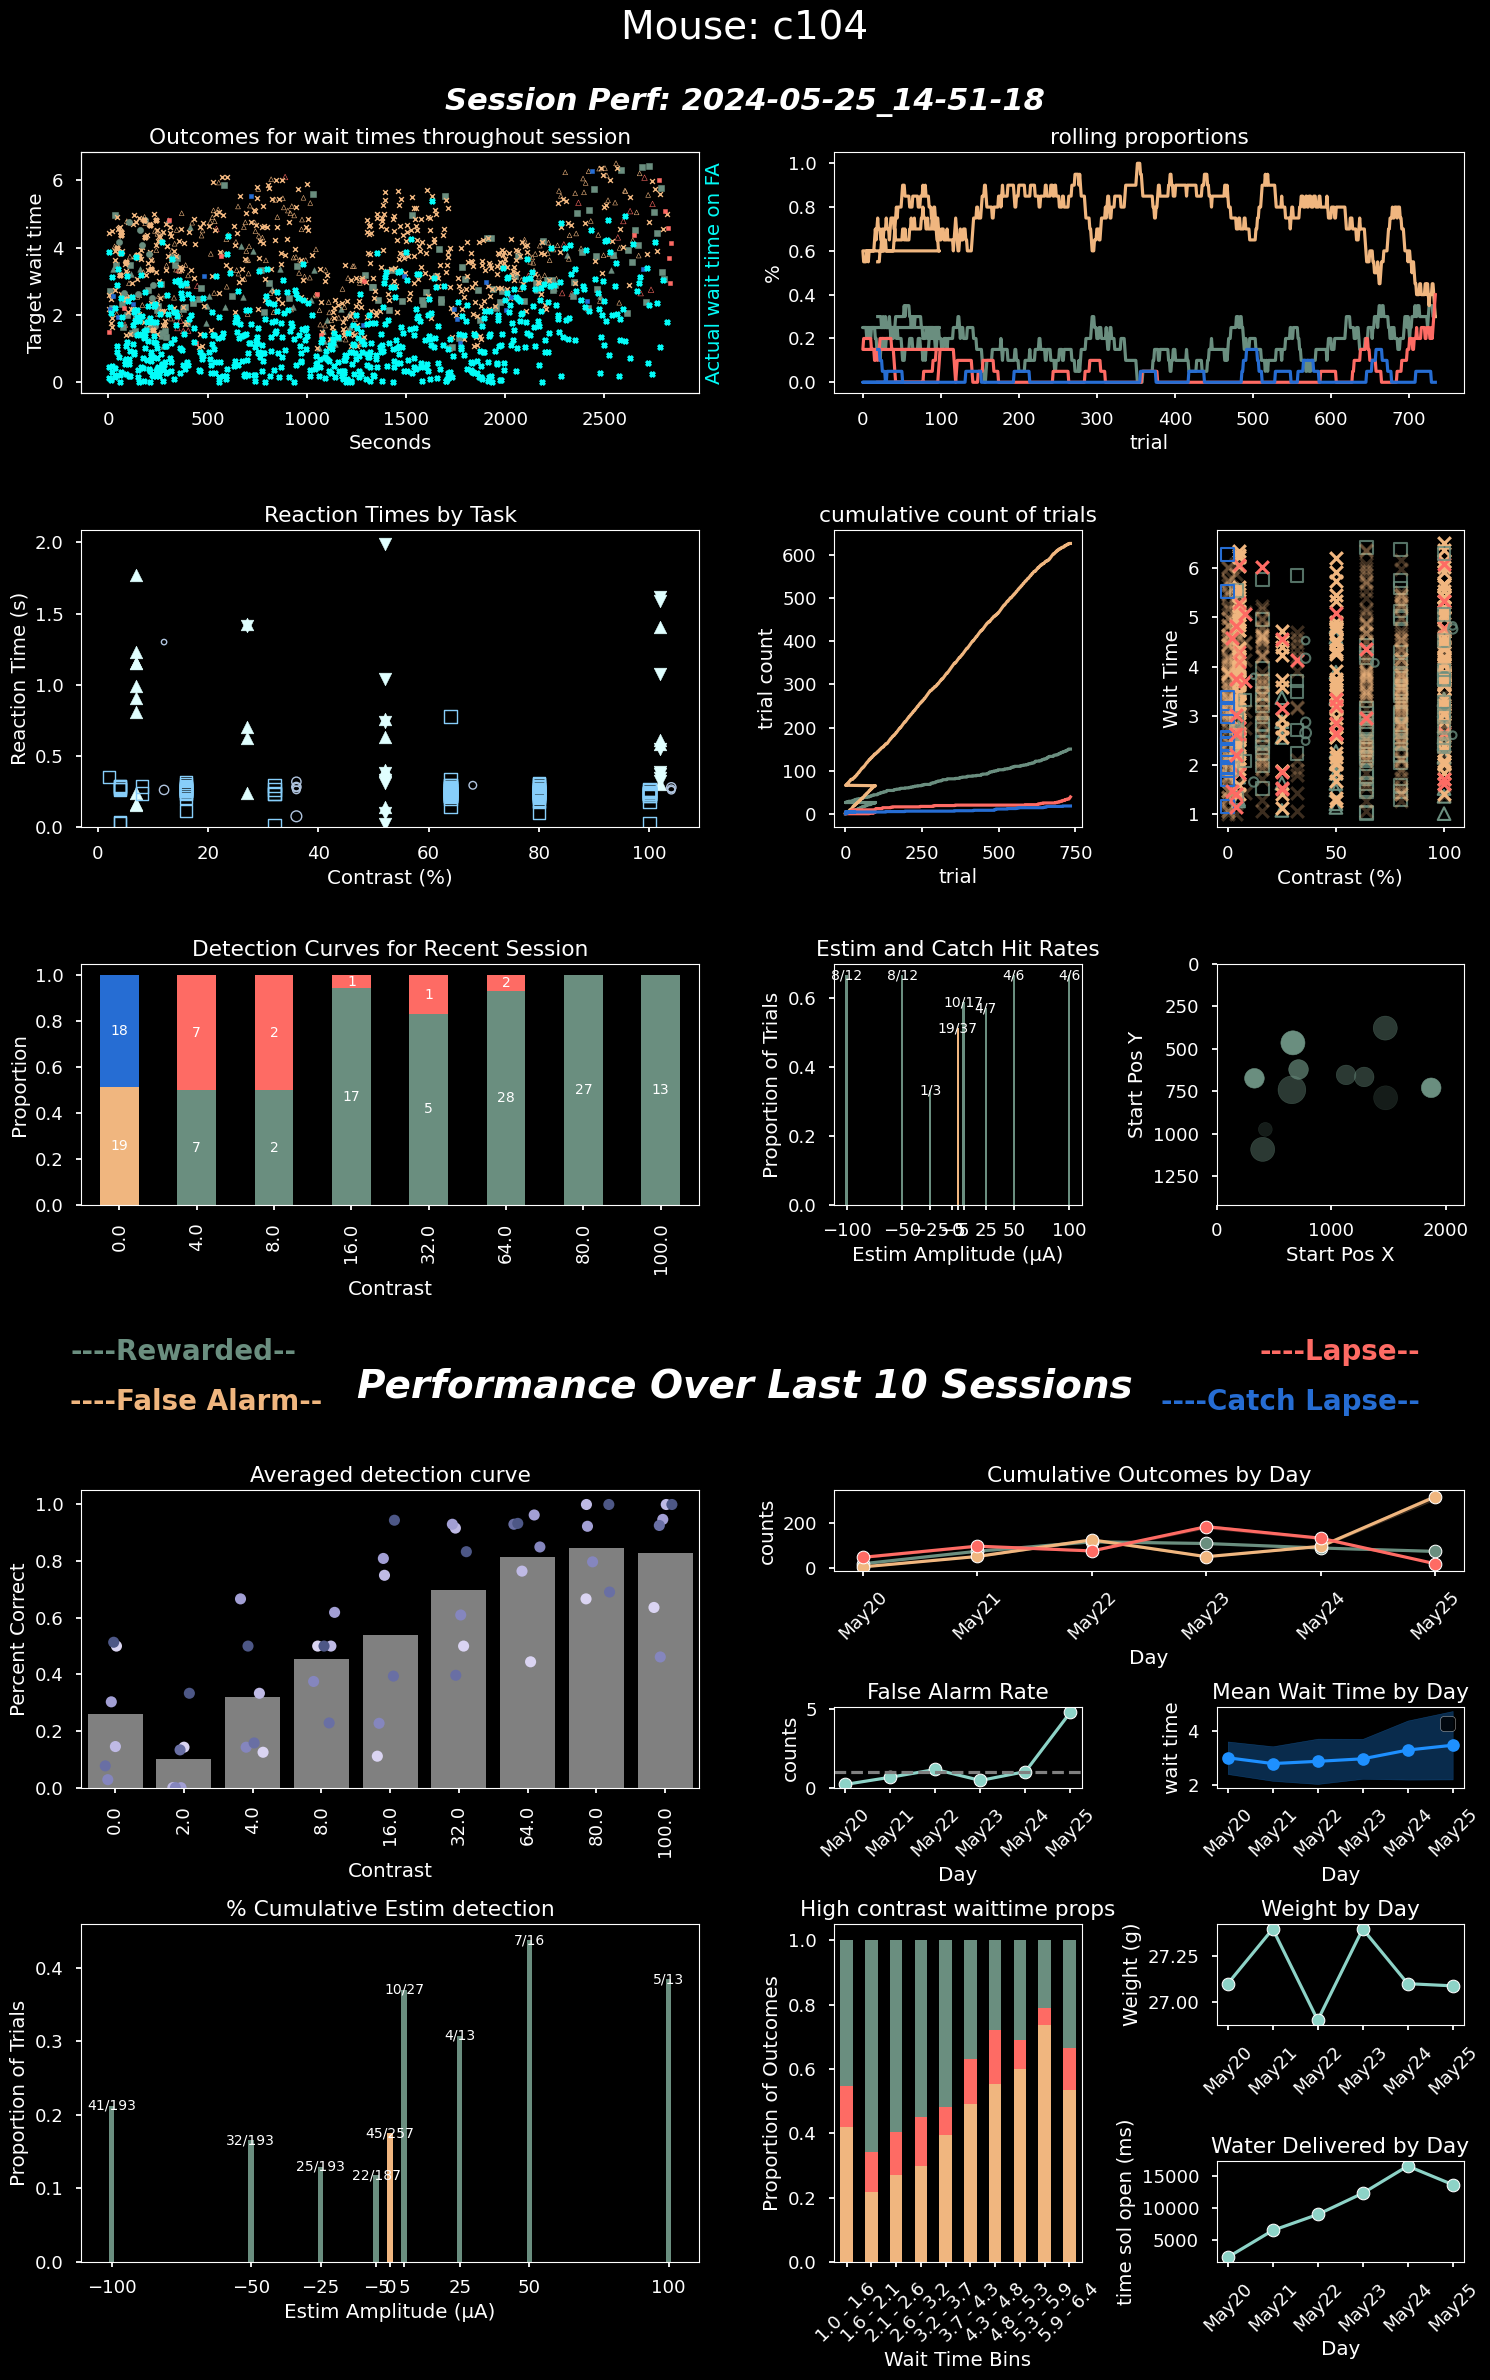

In [3]:
plotter.summary_plots(df25)

In [54]:
from matplotlib import gridspec
def summary_plots(self, df):
    plt.style.use(['dark_background', 'seaborn-v0_8-talk'])
    # set up figure and gridspec
    f = plt.figure(figsize=(15, 25))
    gs = gridspec.GridSpec(9, 3, height_ratios=[6, 2, 2, 6, 0.3, 2, 2, 2.5, 2.5], width_ratios=[5, 2, 2])
    # add main title and subheadings
    mouse_name = self.params['mouse']
    session_directory = self.params['start_time_string']
    
    
    f.suptitle(f'Mouse: {mouse_name}', fontsize=28)
    f.text(0.5, 0.94, f'Session Perf: {session_directory}', ha='center',
            fontsize=22, weight = 'bold', style = 'italic')
    

    f.text(0.5, 0.425, 'Performance Over Last 10 Sessions', ha='center', fontsize=28,
            weight = 'bold', style = 'italic')
    
    f.text(0.05, 0.44, '----Rewarded--', ha = 'left', color = self.colors['rewarded'], 
            fontsize = 20, weight = 'bold')
    f.text(0.05, 0.42, '----False Alarm--', ha = 'left', color = self.colors['false_alarm'], 
            fontsize = 20, weight = 'bold')
    f.text(0.95, 0.44, '----Lapse--', ha = 'right', color = self.colors['lapse'], 
            fontsize = 20, weight = 'bold')
    f.text(0.95, 0.42, '----Catch Lapse--', ha = 'right', color = self.colors['catch_lapse'], 
            fontsize = 20, weight = 'bold')



    ## daily plots! 5 plots (2 left column, 3 right column)
    # First column plots
    ax0 = plt.subplot(gs[0, 0])  # This plot spans the first two rows of the first column 
    try:
        self.plot_wait_time_vs_starttime_alltasks(ax0, df)
    except:
        print('wait times not working')
    
    ax1 = plt.subplot(gs[1:3, 0])  
    try:
        self.plot_reaction_times_alltasks(ax1, df)
        ax1.legend_.remove()
    except:
        print('reaction time no work')

    # Second column plots,       
    ax2 = plt.subplot(gs[0, 1:3])
    try:
        self.plot_rolling_proportion(ax2, df)
    except:
        print('rolling distributions not working')

    ax3 = plt.subplot(gs[1:3, 1]) 
    try: 
        self.plot_cumulative_count(ax3, df)
    except:
        print('cumulative counts did not work')
    ax4 = plt.subplot(gs[1:3, 2])  
    try:
        self.plot_wait_time_vs_contrast_alltasks(ax4, df)
    except:
        print('wait_time_vs_contrast_alltasks did not work')
    
    ax5 = plt.subplot(gs[3, 0]) # contrast curves for day
    try:
        self.plot_outcomes_by_contrast(ax5, df)
    except:
        print('outcomes by contrast did not work')
    
    ax6 = plt.subplot(gs[3, 1]) # estim and catch lapse for day
    try:
        self.plot_estim_and_catch_trial_hitrates(ax6, df)
    except:
        print('unable to plot estim and catch trial hitrates')
    ax7 = plt.subplot(gs[3, 2]) # spatial circle for day 
    try:
        self.plot_moving_circles(ax7, df)
    except: 
        print('moving circles did not plot')
        
    ## Summary of recent sessions (currently 10)
    combined_df = self.load_and_combine_dataframes(base_path = r"C:\Users\jordan\Desktop\c104")
    sum0 = plt.subplot(gs[5:7,0])
    try:
        self.plot_detection_curve_percent_correct(sum0, combined_df)
        sum0.set_title('Averaged detection curve')
        sum0.legend_.remove()
    except:
        print('detection curve did not plot')
    
    sum05 = plt.subplot(gs[7:9,0])
    if (combined_df['task'] == 'estim').any():
        try:
            self.plot_estim_and_catch_trial_hitrates(sum05, combined_df)
        except:
            print('percent correct by day did not owkr')
        sum05.set_title('% Cumulative Estim detection')
    else:
        try:
            self.plot_percent_correct_heatmap(sum05, combined_df)
        except:
            print('percent correct heatmap did not work')
    
    
    sum1 = plt.subplot(gs[5, 1:3])
    try: 
        self.plot_cumulative_counts(combined_df, sum1, 'rewarded')
        self.plot_cumulative_counts(combined_df, sum1, 'false_alarm')
        self.plot_cumulative_counts(combined_df, sum1, 'lapse')
    except:
        print('Oops, Cumulative Outcomes by Day plot didnt work.')
    sum1.set_title('Cumulative Outcomes by Day')
    
    sum2 = plt.subplot(gs[6, 1])
    try:
        self.plot_cumulative_counts(combined_df, sum2, 'false_alarm/rewarded')
    except:
        print('false alarm rate didnt work')
    sum2.set_title('False Alarm Rate')

    sum2half = plt.subplot(gs[6,2])
    try:
        self.plot_mean_wait_time_by_day(sum2half, combined_df)
    except:
        print('mean wait time by day didnt work')
    sum2half.set_title('Mean Wait Time by Day')

    sum4 = plt.subplot(gs[7:9, 1])
    try:
        self.plot_proportions_by_wait_time(sum4, combined_df, num_bins = 10)
    except:
        print('no high contrast waittime proportions')
    sum4.set_title('High contrast waittime props')

    sum5 = plt.subplot(gs[7, 2])
    try:
        self.plot_weight_by_day(sum5, combined_df)
    except:
        print('weight by day didnt plot')
    sum5.set_title('Weight by Day')

    sum6 = plt.subplot(gs[8, 2])
    try:
        self.plot_water_delivered_by_day(sum6, combined_df)
    except:
        print('water delivery by day no work')
    sum6.set_title('Water Delivered by Day')



    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) 
    
    folder = self.params['directory']
    save_str = os.path.join(folder, 'summary_plot.png')
    plt.savefig(save_str)
    

c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_

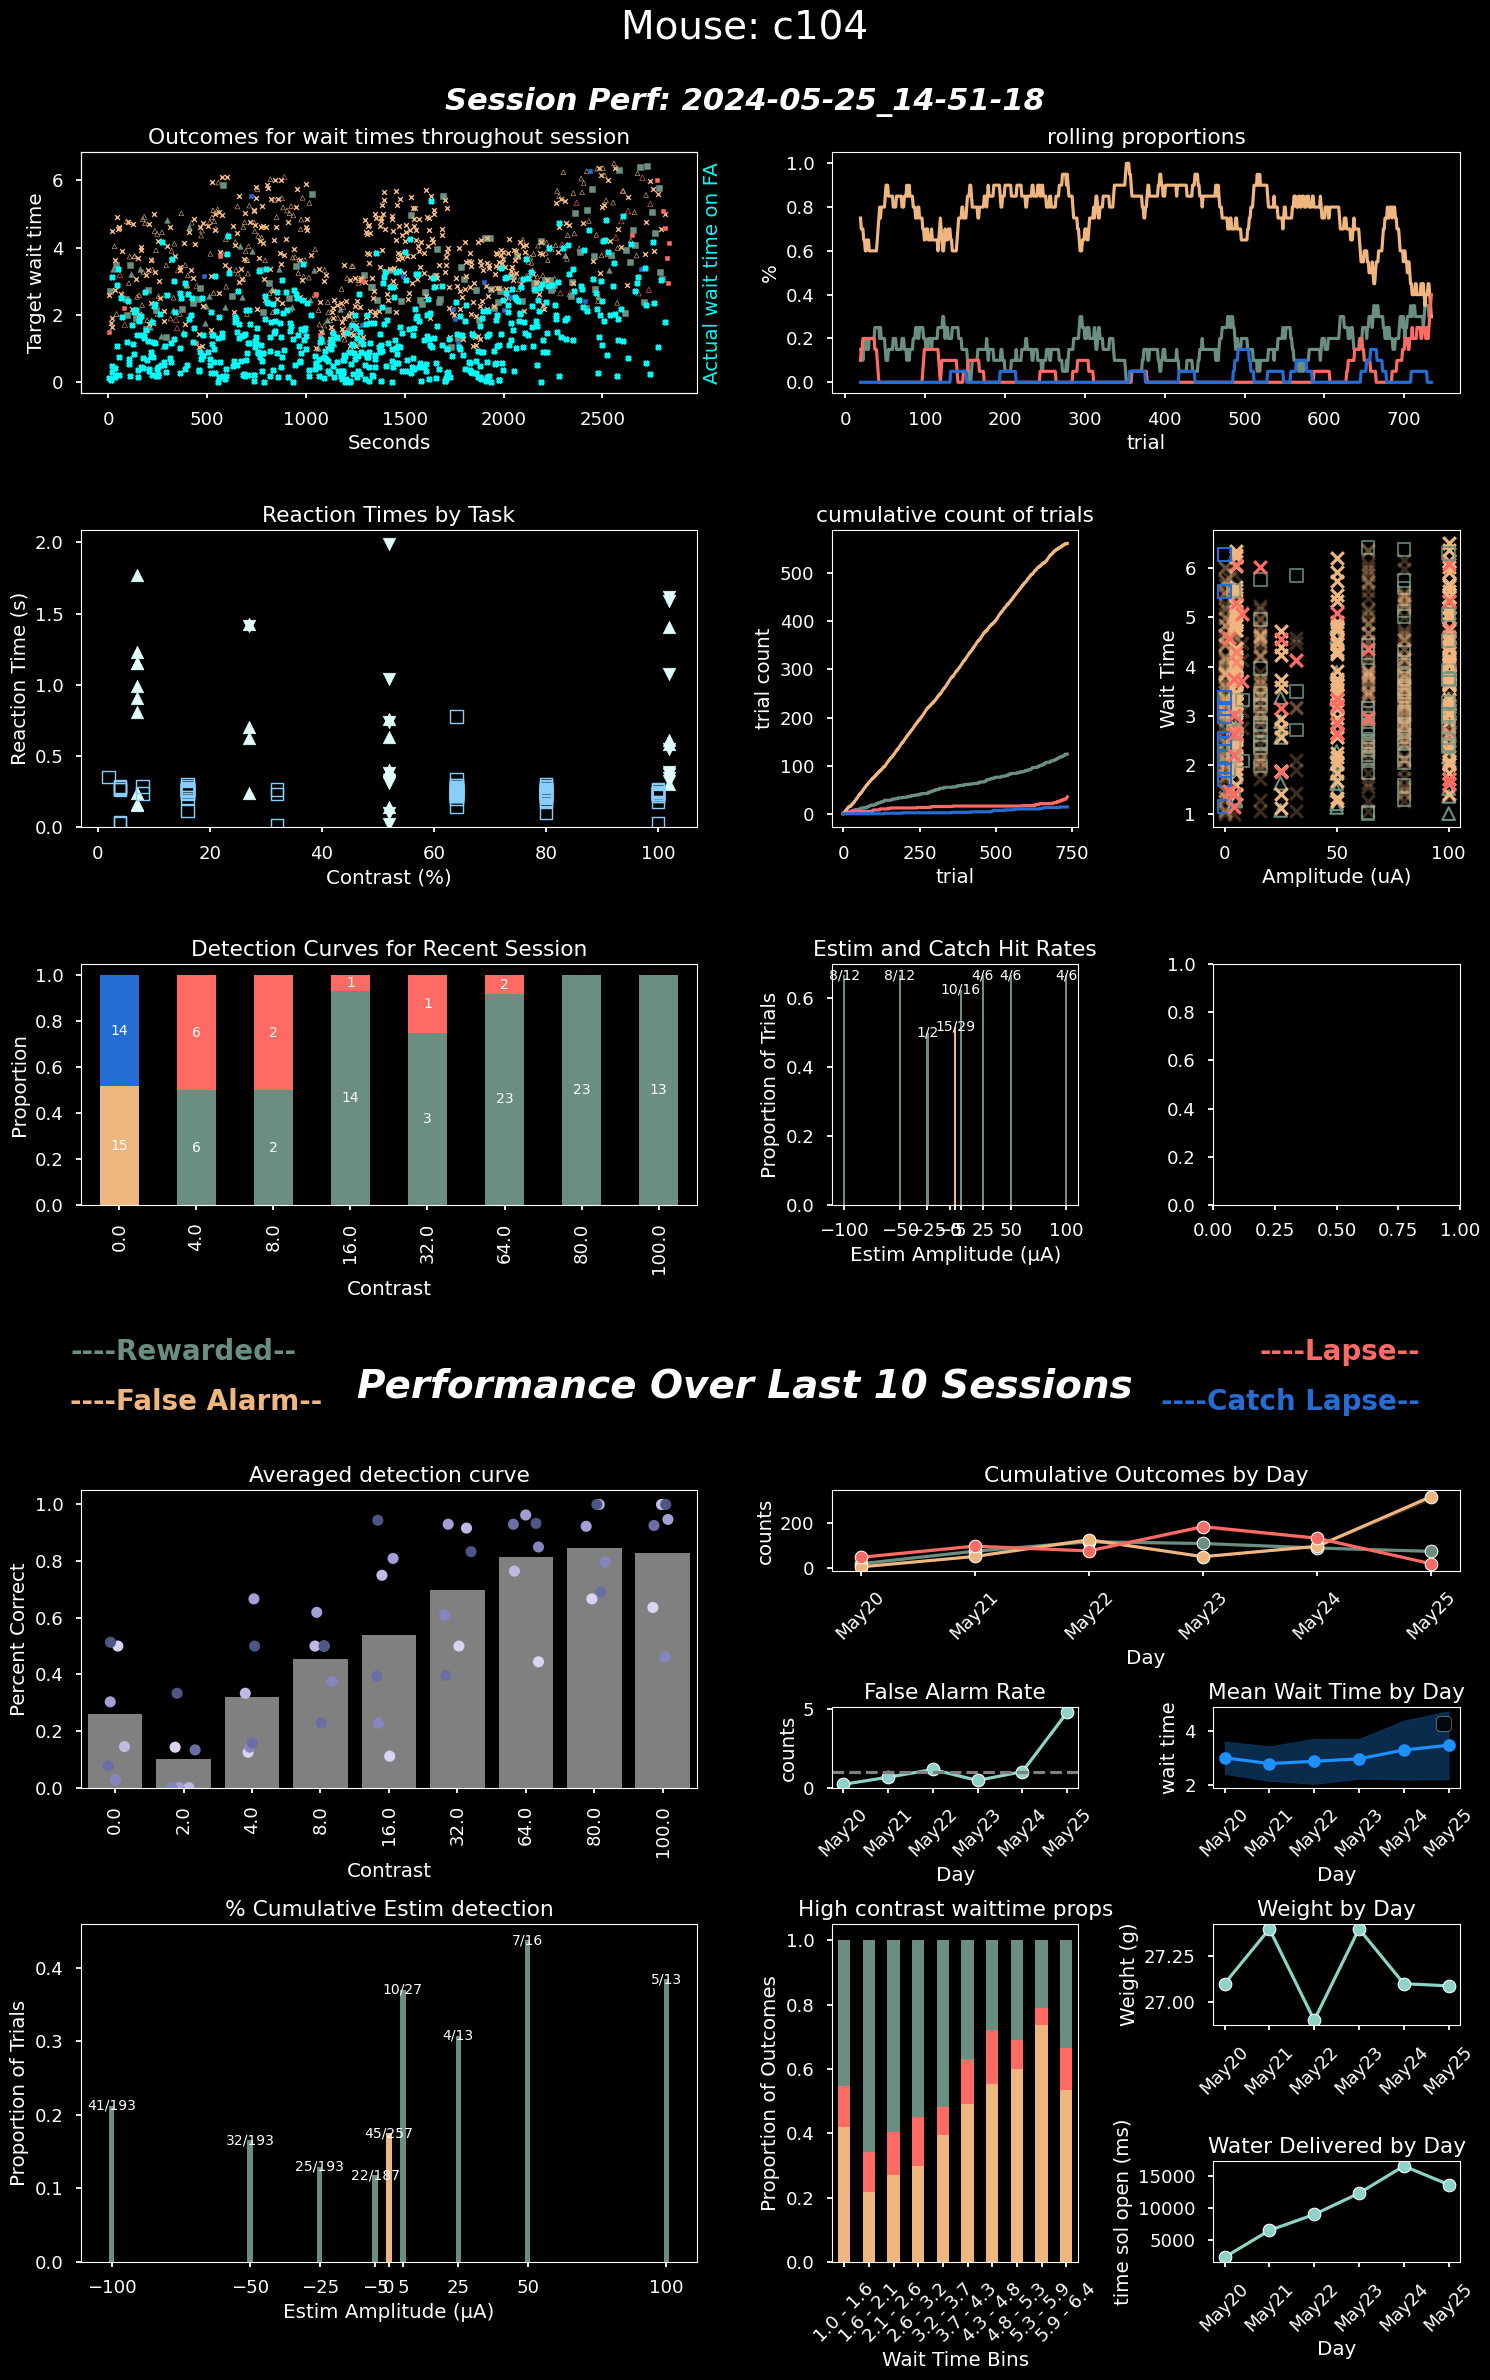

In [55]:
df = df25_2
summary_plots(plotter, df)

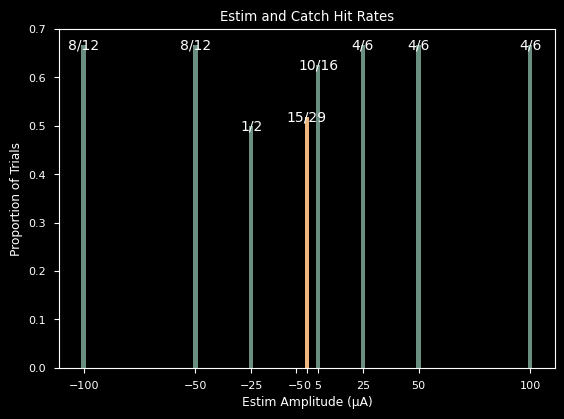

In [3]:
f, ax = plt.subplots()
plotter.plot_estim_and_catch_trial_hitrates(ax, df25_2)

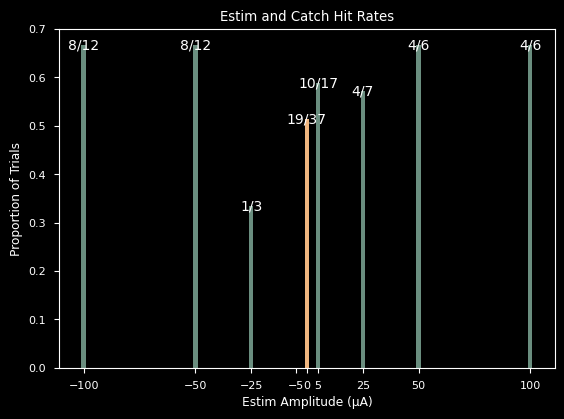

In [8]:
f, ax = plt.subplots()
plotter.plot_estim_and_catch_trial_hitrates(ax, df25)

In [5]:
d24_1 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-24_14-10-37\2024-05-24_14-10-37.csv")
d24_2 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-24_14-13-21\2024-05-24_14-13-21.csv")
d24_3 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-24_14-41-34\2024-05-24_14-41-34.csv")
d24 = pd.concat([d24_1, d24_2, d24_3])

d23_1 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-23_11-16-09\2024-05-23_11-16-09.csv")
d23_2 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-23_11-43-19\2024-05-23_11-43-19.csv")
d23 = pd.concat([d23_1, d23_2])

d22 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-22_14-39-07\2024-05-22_14-39-07.csv")

d21 = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-21_15-12-28\2024-05-21_15-12-28.csv")

In [6]:
df_combined = pd.concat([d21, d22, d23, d24, df25])

Text(0.5, 1.0, 'All')

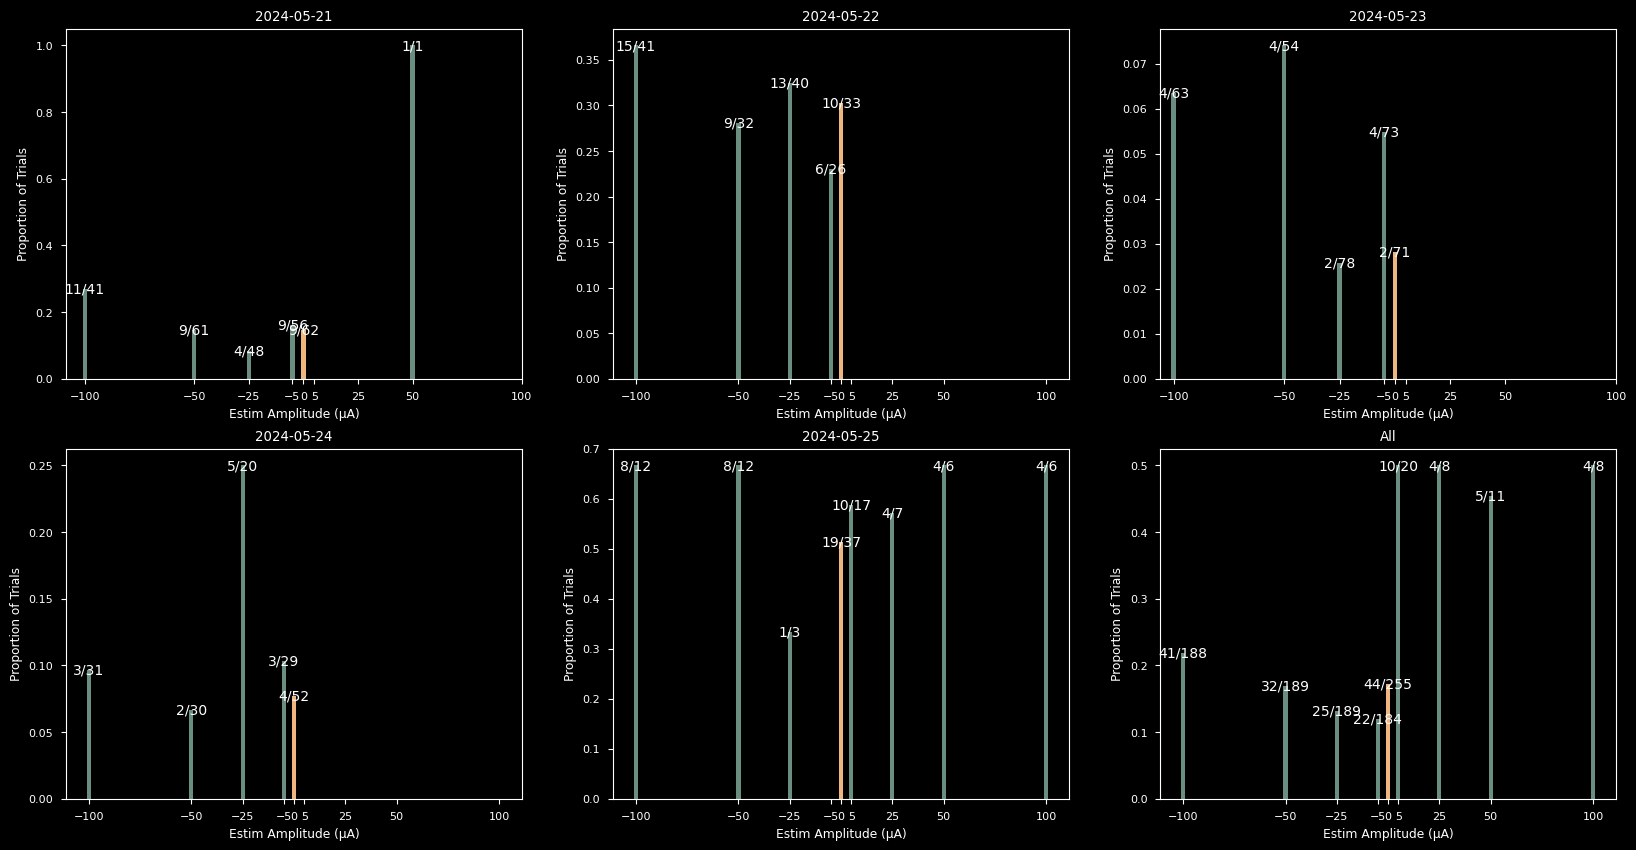

In [9]:
f, ax = plt.subplots(2,3, figsize=(20,10))

plotter.plot_estim_and_catch_trial_hitrates(ax[0,0], d21)
ax[0,0].set_title("2024-05-21")
plotter.plot_estim_and_catch_trial_hitrates(ax[0,1], d22)
ax[0,1].set_title("2024-05-22")
plotter.plot_estim_and_catch_trial_hitrates(ax[0,2], d23)
ax[0,2].set_title("2024-05-23")
plotter.plot_estim_and_catch_trial_hitrates(ax[1,0], d24)
ax[1,0].set_title("2024-05-24")
plotter.plot_estim_and_catch_trial_hitrates(ax[1,1], df25)
ax[1,1].set_title("2024-05-25")
plotter.plot_estim_and_catch_trial_hitrates(ax[1,2], df_combined)
ax[1,2].set_title("All")

Text(0, 0.5, 'Number of Trials')

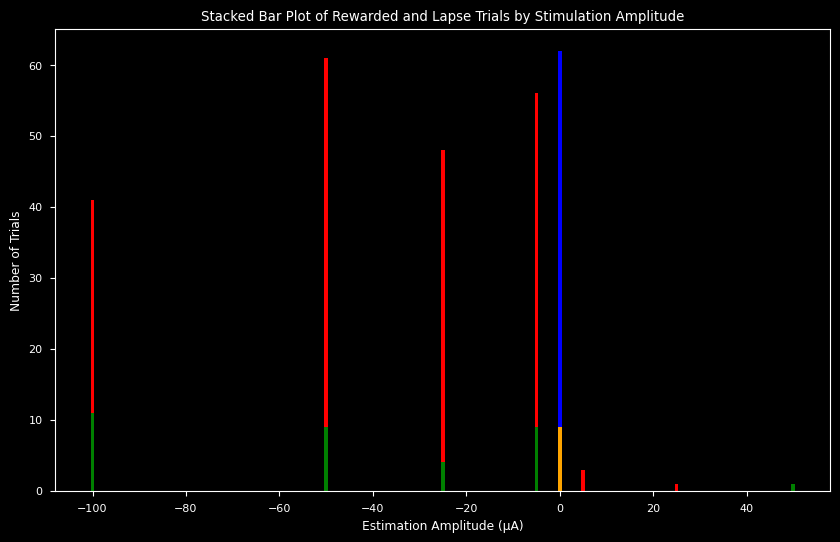

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtering the dataframe for 'estim' task
estim_session = new_df[new_df['task'] == 'estim']

# Grouping by 'estim_amp' and summarizing the count of rewarded and lapse trials
grouped = estim_session.groupby('estim_amp').agg({
    'rewarded': 'sum',  # Counting True values for rewarded
    'lapse': 'sum'      # Counting True values for lapse
}).reset_index()


catch_session = new_df[new_df['contrast']== 0]
catch_lapses = len(catch_session[catch_session['catch_lapse'] == True])
catch_FAs = len(catch_session[catch_session['outcome'] == 'Catch False Alarm'])
# Plotting the stacked bar plot


plt.figure(figsize=(10, 6))
plt.bar(grouped['estim_amp'], grouped['rewarded'], label='Rewarded', color='green')
plt.bar(grouped['estim_amp'], grouped['lapse'], bottom=grouped['rewarded'], label='Lapse', color='red')

plt.bar(0, catch_FAs, label='Catch False Alarm', color='orange')
plt.bar(0, catch_lapses, bottom=catch_FAs, label='Catch Lapse', color='blue')

plt.title('Stacked Bar Plot of Rewarded and Lapse Trials by Stimulation Amplitude')
plt.xlabel('Estimation Amplitude (µA)')
plt.ylabel('Number of Trials')



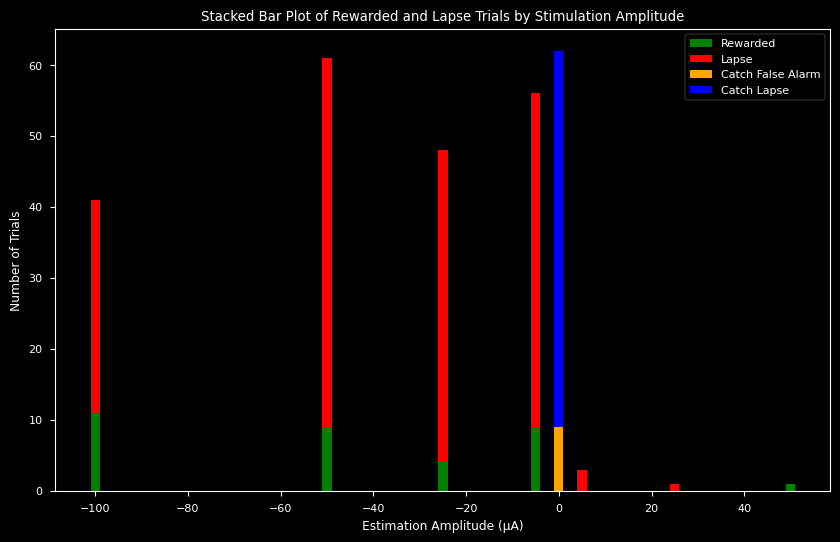

In [44]:
def plot_estim_and_catch_outcomes(ax, df):
    """
    Plot the number of 'rewarded' and 'lapse' trials for 'estim' sessions and 'catch' trials.
    
    Args:
    ax (matplotlib.axes.Axes): The axes object where the plot will be drawn.
    df (pandas.DataFrame): The dataframe containing trial data.
    """
    # Filtering for 'estim' task and summarizing counts
    estim_session = df[df['task'] == 'estim']
    grouped_estim = estim_session.groupby('estim_amp').agg({
        'rewarded': 'sum',  # Counting True values for rewarded
        'lapse': 'sum'      # Counting True values for lapse
    }).reset_index()
    
    # Filtering for 'catch' sessions and counting outcomes
    catch_session = df[df['contrast'] == 0]
    catch_lapses = len(catch_session[catch_session['catch_lapse'] == True])
    catch_FAs = len(catch_session[catch_session['outcome'] == 'Catch False Alarm'])
    
    # Plotting 'estim' trials
    ax.bar(grouped_estim['estim_amp'], grouped_estim['rewarded'], label='Rewarded', color='green', width = 2)
    ax.bar(grouped_estim['estim_amp'], grouped_estim['lapse'], bottom=grouped_estim['rewarded'], label='Lapse', color='red', width = 2)
    
    # Adding 'catch' trial results at an amplitude of 0 for visual separation
    ax.bar(0, catch_FAs, label='Catch False Alarm', color='orange', width=2)  # Added width for better visualization
    ax.bar(0, catch_lapses, bottom=catch_FAs, label='Catch Lapse', color='blue', width=2)
    
    # Setting chart titles and labels
    ax.set_title('Stacked Bar Plot of Rewarded and Lapse Trials by Stimulation Amplitude')
    ax.set_xlabel('Estimation Amplitude (µA)')
    ax.set_ylabel('Number of Trials')
    ax.legend()

# Example usage:
fig, ax = plt.subplots(figsize=(10, 6))
plot_estim_and_catch_outcomes(ax, new_df)  #
plt.show()


In [52]:
grouped_estim = estim_session.groupby('estim_amp').agg({
    'rewarded': 'sum',  # Counting True values for rewarded
    'lapse': 'sum'
}).reset_index()

In [53]:
grouped_estim

,estim_amp,rewarded,lapse
0,-100.0,11,30
1,-50.0,9,52
2,-25.0,4,44
3,-5.0,9,47
4,5.0,0,3
5,25.0,0,1
6,50.0,1,0


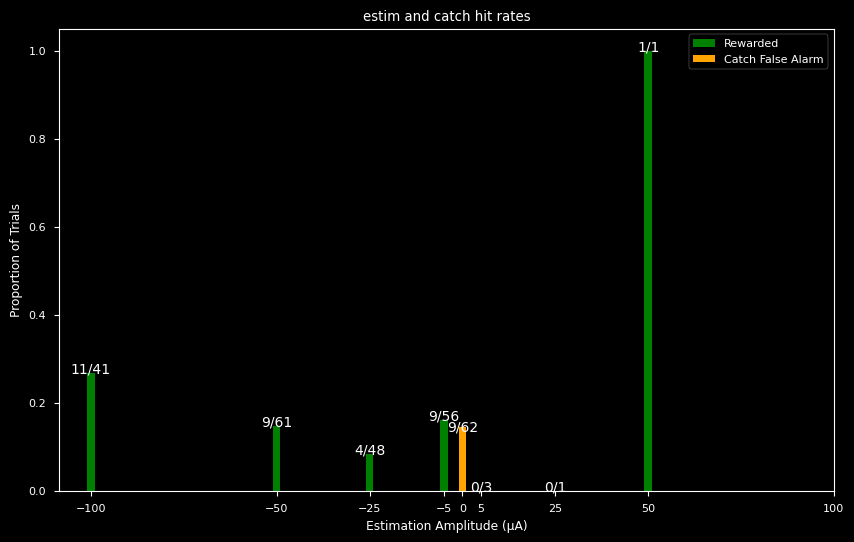

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_estim_and_catch_trial_hitrates(ax, df):
    """
    Plot the normalized 'rewarded' and 'Catch False Alarm' (Catch FA) rates for 'estim' and 'catch' trials,
    including text annotations for the ratio of 'rewarded' to 'total' trials.
    
    Args:
    ax (matplotlib.axes.Axes): The axes object where the plot will be drawn.
    df (pandas.DataFrame): The dataframe containing trial data.
    """
    # Filtering for 'estim' task and summarizing counts
    estim_session = df[df['task'] == 'estim']
    grouped_estim = estim_session.groupby('estim_amp').agg({
        'rewarded': 'sum',  # Counting True values for rewarded
        'lapse': 'sum',
    }).reset_index()
    grouped_estim['total'] = grouped_estim['rewarded'] + grouped_estim['lapse']
    
    
    # Normalizing rewarded rate
    grouped_estim['norm_rewarded'] = grouped_estim['rewarded'] / grouped_estim['total']
    
    # Filtering for 'catch' sessions and counting Catch FA outcomes
    catch_session = df[df['contrast'] == 0]
    catch_FAs = (catch_session['outcome'] == 'Catch False Alarm').sum()
    total_catch = catch_FAs + (catch_session['catch_lapse'] == True).sum()
    
    # Normalizing Catch FA rate
    norm_catch_FA = catch_FAs / total_catch
    
    # Plotting 'estim' trials for rewarded
    bars = ax.bar(grouped_estim['estim_amp'], grouped_estim['norm_rewarded'], label='Rewarded', color='green', width=2)
    
    # Adding 'catch' trial results at an amplitude of 0 for visual separation
    ax.bar(0, norm_catch_FA, label='Catch False Alarm', color='orange', width=2)
    
    # Annotating counts on the bars as 'rewarded/total'
    for rect, rewarded, total in zip(bars, grouped_estim['rewarded'], grouped_estim['total']):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{rewarded}/{total}', ha='center', va='baseline')
    
    # Annotating Catch FA count at amplitude 0
    ax.text(0, norm_catch_FA, f'{catch_FAs}/{total_catch}', ha='center', va='center', color='white')
    
    # Setting chart titles and labels
    ax.set_title('estim and catch hit rates')
    ax.set_xlabel('Estimation Amplitude (µA)')
    ax.set_xticks([-100, -50, -25,-5, 0, 5, 25, 50, 100])
    ax.set_ylabel('Proportion of Trials')
    ax.legend()

# Example usage:
fig, ax = plt.subplots(figsize=(10, 6))
plot_estim_and_catch_trial_hitrates(ax, new_df)  # Assuming new_df is already defined in your environment



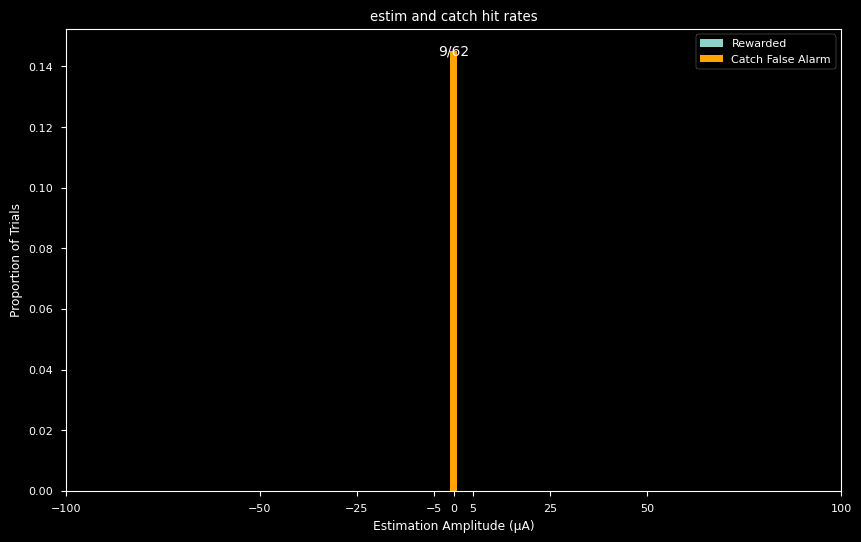

In [69]:
test = new_df[new_df['task'] == 'gratings']

fig, ax = plt.subplots(figsize=(10, 6))
plot_estim_and_catch_trial_hitrates(ax, test) 

In [6]:
import json
file_path = r"C:\Users\jordan\Desktop\c104\2024-05-21_15-12-28\params.json"

with open(file_path, 'r') as file:
    params = json.load(file)

plotter= Plotter(params)

In [7]:
def get_session_catch_rate_session(df):
    catch_df = df[df['contrast'] == 0]
    if 'Catch False Alarm' not in df.outcome.values:
        num_catch_lapses = len(catch_df[catch_df['catch_lapse']])
        catch_FA = catch_df[catch_df['false_alarm']]
        num_catch_FAs = len(catch_FA[catch_FA['stim_on_time'] - catch_FA['trial_start_time'] > 0])
        catch_FA_rate = num_catch_FAs / (num_catch_FAs + num_catch_lapses)
    else:
        num_catch_lapses = len(catch_df[catch_df['catch_lapse']])
        num_catch_FAs = len(catch_df[catch_df['outcome'] == 'Catch False Alarm'])
        catch_FA_rate = num_catch_FAs / (num_catch_FAs + num_catch_lapses)
    return catch_FA_rate, num_catch_FAs, num_catch_lapses



In [21]:
import pandas as pd

def get_session_catch_rate(df):
    # Define the function to apply to each group
    def calculate_catch_rate(group):
        catch_df = group[group['contrast'] == 0]
        if 'Catch False Alarm' not in group['outcome'].values:
            num_catch_lapses = len(catch_df[catch_df['catch_lapse']])
            catch_FA = catch_df[catch_df['false_alarm']]
            num_catch_FAs = len(catch_FA[catch_FA['stim_on_time'] - catch_FA['trial_start_time'] > 0])
        else:
            num_catch_lapses = len(catch_df[catch_df['catch_lapse']])
            num_catch_FAs = len(catch_df[catch_df['outcome'] == 'Catch False Alarm'])

        if num_catch_FAs + num_catch_lapses == 0:  # Avoid division by zero
            catch_FA_rate = 0
        else:
            catch_FA_rate = num_catch_FAs / (num_catch_FAs + num_catch_lapses)
        return catch_FA_rate, num_catch_FAs, num_catch_lapses

    # Group by session date and apply the function
    results = df.groupby('day').apply(calculate_catch_rate)

    return results




In [22]:
path = r"C:\Users\jordan\Desktop\c104"
combined_df = plotter.load_and_combine_dataframes(base_path = path)

In [23]:
catch_combined = combined_df[combined_df['contrast'] == 0]


In [24]:
catch_results = get_session_catch_rate(combined_df)

C:\Users\jordan\AppData\Local\Temp\ipykernel_7616\1955028992.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('day').apply(calculate_catch_rate)


In [25]:
catch_results.values

array([(0.043478260869565216, 1, 22), (0.125, 1, 7),
       (0.16666666666666666, 2, 10), (0.45454545454545453, 5, 6),
       (0.2, 4, 16), (0.058823529411764705, 1, 16),
       (0.3333333333333333, 7, 14), (0.1111111111111111, 1, 8),
       (0.14516129032258066, 9, 53)], dtype=object)

In [26]:
catch_rates = [x[0] for x in catch_results.values]

In [27]:
get_session_catch_rate_session(new_df)

(0.14516129032258066, 9, 53)

In [28]:
get_session_catch_rate_session(old_df)

(0.058823529411764705, 1, 16)

In [29]:
may20_df = pd.read_csv(r"C:\Users\jordan\Desktop\c104\2024-05-20_14-34-09\2024-05-20_14-34-09.csv")

In [30]:
get_session_catch_rate_session(may20_df)

(0.5625, 9, 7)

In [31]:

def calculate_estim_hitrate(df):
    # Filter for rows where the task is 'estim'
    estim_df = df[df['task'] == 'estim']
    
    # Group by 'session_date' and 'estim_amp'
    grouped = estim_df.groupby(['day', 'estim_amp'])
    
    # Define a function to apply to each group to calculate the rate
    def rate_calc(group):
        rewarded_count = group['rewarded'].sum()  # Summing boolean counts True as 1
        lapse_count = group['lapse'].sum()  # Summing boolean counts True as 1
        if rewarded_count + lapse_count == 0:  # Avoid division by zero
            rate = 0
        else:
            rate = rewarded_count / (rewarded_count + lapse_count)
        return rate
    
    # Apply the function to each group and return the results
    rates = grouped.apply(rate_calc)
    
    return rates

# Example usage
# Assuming 'data' is your DataFrame containing the combined data from multiple sessions
estim_rates = calculate_estim_hitrate(combined_df)



C:\Users\jordan\AppData\Local\Temp\ipykernel_7616\3178506313.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rates = grouped.apply(rate_calc)


In [32]:
estim_rates

day    estim_amp
May16  -100.0       0.160000
       -50.0        0.209302
       -25.0        0.133333
       -5.0         0.133333
        5.0         0.142857
        25.0        0.047619
        50.0        0.217391
        100.0       0.058824
May17  -100.0       0.250000
       -50.0        0.240000
       -25.0        0.066667
       -5.0         0.000000
        5.0         0.208333
        25.0        0.057143
        50.0        0.062500
        100.0       0.161290
May19  -100.0       0.541667
       -50.0        0.333333
       -25.0        0.200000
       -5.0         0.392857
        5.0         0.375000
        25.0        0.296296
        50.0        0.250000
        100.0       0.263158
May20  -100.0       0.200000
       -50.0        0.210526
       -25.0        0.000000
       -5.0         0.000000
        5.0         0.076923
        25.0        0.076923
        50.0        0.105263
        100.0       0.300000
May21  -100.0       0.268293
       -50.0        0.1475

Text(0, 0.5, 'Detection Rate')

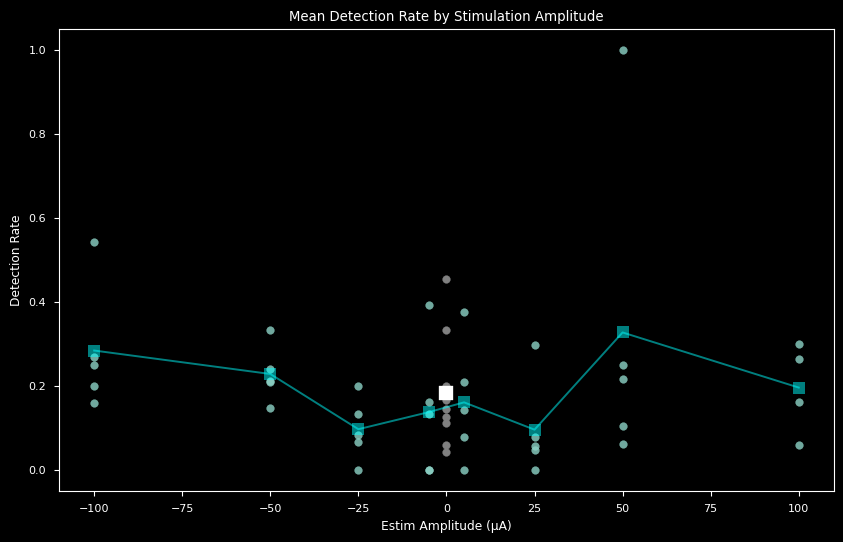

In [33]:
# Converting the dictionary to a pandas Series with a MultiIndex
index = pd.MultiIndex.from_tuples(estim_rates.keys(), names=['session', 'estim_amp'])
series = pd.Series(estim_rates, index=index)

# Convert series to DataFrame for easier manipulation
df = series.reset_index()
df.columns = ['session', 'estim_amp', 'detection_rate']

# Group by amplitude to calculate mean detection rate across sessions
mean_rates = df.groupby('estim_amp')['detection_rate'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['estim_amp'], df['detection_rate'], alpha=0.8, label='Individual Points')
plt.plot(mean_rates.index, mean_rates.values, marker = 's', markersize = 8, alpha = 0.5, color = 'cyan', label='Mean Detection Rate')
plt.scatter([0 for x in catch_rates], catch_rates, color = 'gray')
plt.scatter(0, np.mean(catch_rates), color = 'white', marker = 's', s = 100)
plt.title('Mean Detection Rate by Stimulation Amplitude')
plt.xlabel('Estim Amplitude (µA)')
plt.ylabel('Detection Rate')


In [268]:
estim_rates.groupby('estim_amp')

In [238]:
may20_df.columns

Index(['Unnamed: 0', 'trial_number', 'task', 'GRATINGS_INCLUDED',
       'ESTIM_INCLUDED', 'MOVING_CIRCLE_INCLUDED', 'contrast', 'estim_amp',
       'estim_params', 'circle_contrast', 'circle_radius', 'circle_startx',
       'circle_starty', 'catch', 'outcome', 'false_alarm', 'rewarded', 'lapse',
       'catch_lapse', 'quiet_period', 'wait_time', 'trial_start_time',
       'stim_on_time', 'FA_reaction_time', 'reaction_time',
       'rewarded_lick_time', 'autoreward', 'shaping', 'reward_volume',
       'buzzer_volume'],
      dtype='object')

In [240]:
len(may20_df[may20_df.catch_lapse])

7

In [237]:
may20_df.head()

,Unnamed: 0,trial_number,task,GRATINGS_INCLUDED,ESTIM_INCLUDED,MOVING_CIRCLE_INCLUDED,contrast,estim_amp,estim_params,circle_contrast,...,wait_time,trial_start_time,stim_on_time,FA_reaction_time,reaction_time,rewarded_lick_time,autoreward,shaping,reward_volume,buzzer_volume
0,0,1,gratings,True,False,False,80.0,NaN,NaN,NaN,...,1.000000,3.505677,4.507118,NaN,0.366347,4.873465,False,False,70,0.0
1,1,2,gratings,True,False,False,32.0,NaN,NaN,NaN,...,1.000000,6.875326,7.875810,NaN,0.346211,8.222021,False,False,70,0.0
2,2,3,gratings,True,False,False,8.0,NaN,NaN,NaN,...,1.265023,10.222621,11.488705,NaN,0.036642,11.525347,False,False,70,0.0
3,3,4,gratings,True,False,False,80.0,NaN,NaN,NaN,...,2.224082,17.533231,19.757313,1.535787,NaN,NaN,False,False,70,0.0
4,4,5,gratings,True,False,False,100.0,NaN,NaN,NaN,...,3.949223,21.070290,25.019513,3.376669,NaN,NaN,False,False,70,0.0


In [7]:
combined_df.head()

,Unnamed: 0,trial_number,contrast,orientation,catch,outcome,false_alarm,rewarded,lapse,catch_lapse,...,estim_amp,estim_params,task,GRATINGS_INCLUDED,MOVING_CIRCLE_INCLUDED,circle_contrast,circle_radius,circle_startx,circle_starty,day
0,0,1,80.0,NaN,False,False Alarm,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr29
1,1,2,100.0,NaN,False,Reward,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr29
2,2,3,64.0,NaN,False,False Alarm,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr29
3,3,4,0.0,NaN,True,False Alarm,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr29
4,4,5,32.0,NaN,False,Lapse,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr29


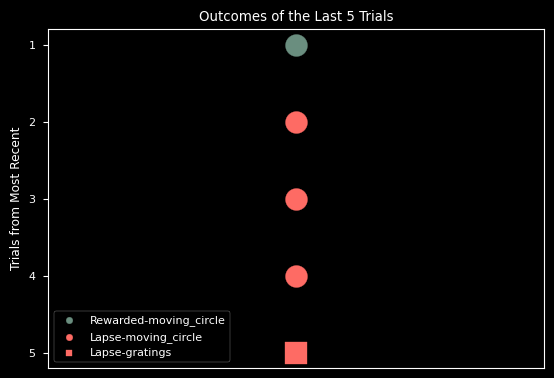

In [8]:
fig, ax = plt.subplots()
plotter.plot_recent_trial_outcomes(ax, df, flip_axes = True)

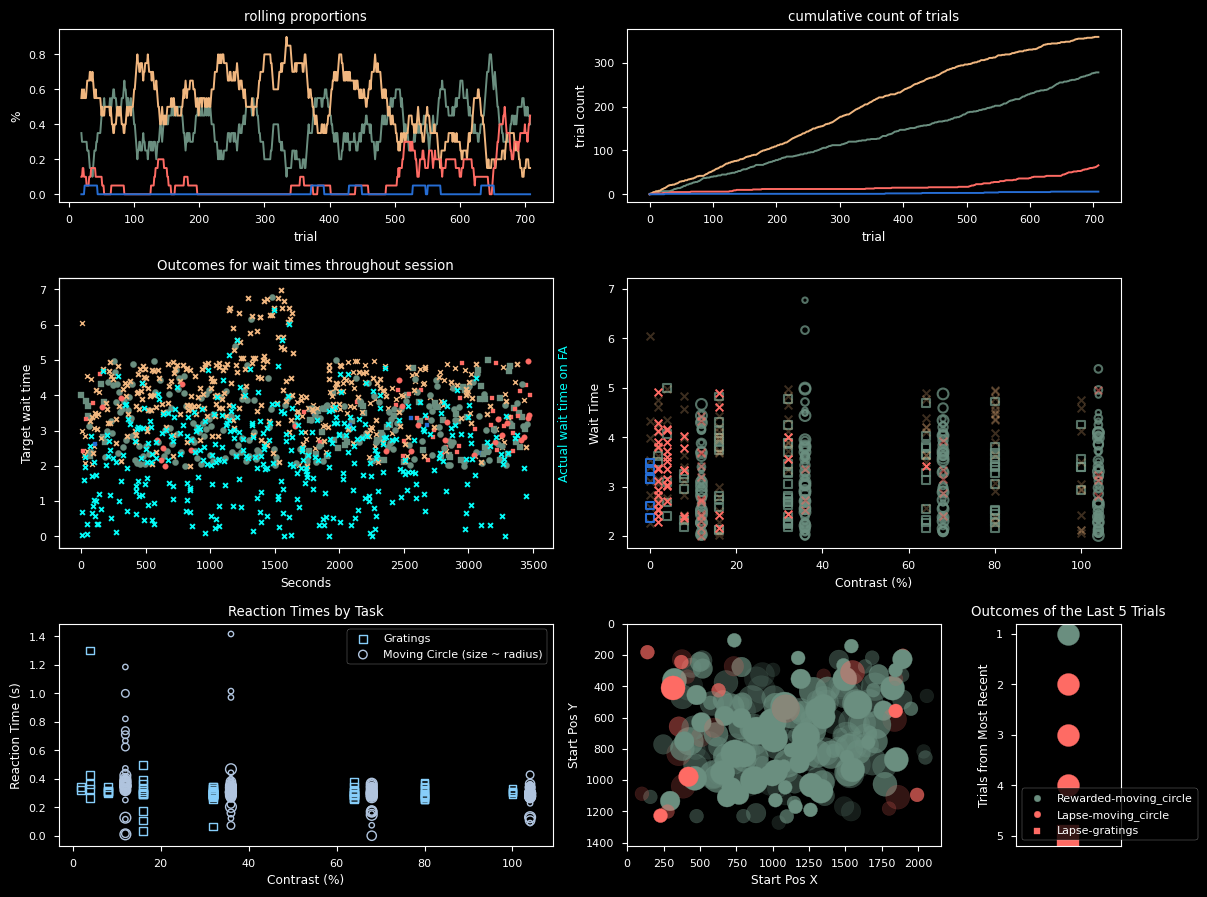

In [9]:
plotter.update_plots2(df)

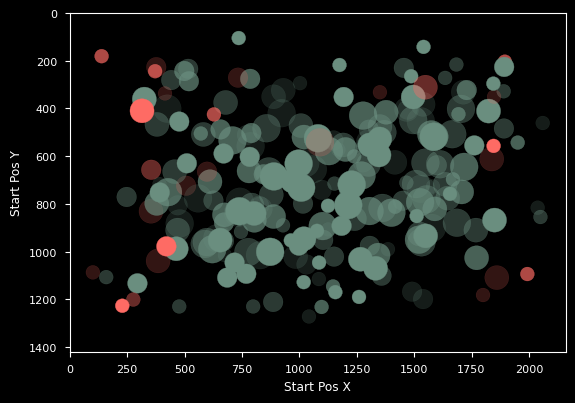

In [14]:
f, ax = plt.subplots()
plotter.plot_moving_circles(ax, df)

In [18]:
contrast = np.array([0.08])
alpha_values = 0.2 + 0.8 * ((contrast - 0.08) / (1 - 0.08))

In [23]:
for task in df['task'].unique():
    task_df = df[df['task'] == task].dropna()
    task_df.head()

In [24]:
df['task'].unique()

array(['gratings', 'moving_circle'], dtype=object)

In [26]:
df[df['task'] == 'gratings']

,Unnamed: 0,trial_number,task,GRATINGS_INCLUDED,ESTIM_INCLUDED,MOVING_CIRCLE_INCLUDED,contrast,estim_amp,estim_params,circle_contrast,circle_radius,circle_startx,circle_starty,catch,outcome,false_alarm,rewarded,lapse,catch_lapse,quiet_period,wait_time,trial_start_time,stim_on_time,reaction_time,autoreward,shaping,reward_volume,buzzer_volume
0,0,1,gratings,True,False,False,64.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Reward,False,True,False,False,1.6,4.018973,2.001375,6.022130,0.375215,False,False,90,0.05
1,1,2,gratings,True,False,False,16.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False Alarm,True,False,False,False,1.6,2.985948,7.999092,6.022130,0.703605,False,False,90,0.05
2,2,3,gratings,True,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,False Alarm,True,False,False,False,1.6,6.048007,10.303999,16.352531,0.051843,False,False,90,0.05
3,3,4,gratings,True,False,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Lapse,False,False,True,False,1.6,2.409298,18.004660,20.414614,-9.301964,False,False,90,0.05
4,4,5,gratings,True,False,False,8.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False Alarm,True,False,False,False,1.6,2.306815,23.516432,20.414614,1.597039,False,False,90,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,698,gratings,True,False,True,100.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Reward,False,True,False,False,1.6,3.395697,3418.529282,3421.926435,0.325692,False,False,68,0.05
699,699,700,gratings,True,False,True,32.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False Alarm,True,False,False,False,1.6,3.878733,3429.027812,3426.990101,1.948654,False,False,68,0.05
701,701,702,gratings,True,False,True,80.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Reward,False,True,False,False,1.6,3.047438,3438.036100,3441.083812,0.320282,False,False,68,0.05
703,703,704,gratings,True,False,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Lapse,False,False,True,False,1.6,4.288475,3445.814888,3450.104318,-1.613889,False,False,68,0.05


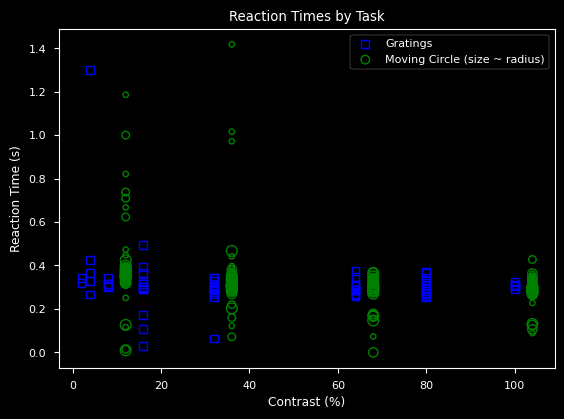

In [54]:
def plot_reaction_times_alltasks(ax, df):
    # Sort the dataframe by task
    df = df[df['rewarded'] == True]
    df = df.sort_values(by='task')

    # Loop through each unique task and plot accordingly
    for task in df['task'].unique():
        task_df = df[df['task'] == task]

        if task == 'gratings':
            ax.scatter(task_df['contrast'], task_df['reaction_time'], marker='s', facecolor = 'none', 
                       color='blue', label='Gratings', linewidth = 1)
            ax.set_xlabel('Contrast (%)')

        elif task == 'estim':
            # Positive amplitudes
            pos_df = task_df[task_df['estim_amp'] >= 0]
            ax.scatter(pos_df['estim_amp']+2, pos_df['reaction_time'], marker='^', color='red', label='Electrical Stimulation (Positive)')
            # Negative amplitudes
            neg_df = task_df[task_df['estim_amp'] < 0]
            ax.scatter(neg_df['estim_amp']-2, neg_df['reaction_time'], marker='v', color='blue', label='Electrical Stimulation (Negative)')
            ax.set_xlabel('Amplitude (uA)')
        
        elif task == 'moving_circle':
            # Convert contrast to gratings contrasts 
            sizes = task_df['circle_radius']*0.15 # Scaling factor for visibility
            ax.scatter(task_df['circle_contrast']*100+4, task_df['reaction_time'], s=sizes, marker='o', 
                       facecolors = 'none', color='green', label='Moving Circle (size ~ radius)',
                       linewidth = 1)
            ax.set_xlabel('Contrast (%)')

    ax.set_ylabel('Reaction Time (s)')
    ax.set_title('Reaction Times by Task')
    ax.legend()


fig, ax = plt.subplots()
plot_reaction_times_alltasks(ax, df)


In [61]:
df.head()

,Unnamed: 0,trial_number,task,GRATINGS_INCLUDED,ESTIM_INCLUDED,MOVING_CIRCLE_INCLUDED,contrast,estim_amp,estim_params,circle_contrast,circle_radius,circle_startx,circle_starty,catch,outcome,false_alarm,rewarded,lapse,catch_lapse,quiet_period,wait_time,trial_start_time,stim_on_time,reaction_time,autoreward,shaping,reward_volume,buzzer_volume
0,0,1,gratings,True,False,False,64.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Reward,False,True,False,False,1.6,4.018973,2.001375,6.022130,0.375215,False,False,90,0.05
1,1,2,gratings,True,False,False,16.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False Alarm,True,False,False,False,1.6,2.985948,7.999092,6.022130,0.703605,False,False,90,0.05
2,2,3,gratings,True,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,False Alarm,True,False,False,False,1.6,6.048007,10.303999,16.352531,0.051843,False,False,90,0.05
3,3,4,gratings,True,False,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,False,Lapse,False,False,True,False,1.6,2.409298,18.004660,20.414614,-9.301964,False,False,90,0.05
4,4,5,gratings,True,False,False,8.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False Alarm,True,False,False,False,1.6,2.306815,23.516432,20.414614,1.597039,False,False,90,0.05


In [78]:
df.outcome.unique()

array(['Reward', 'False Alarm', 'Lapse', 'Catch Lapse'], dtype=object)

In [77]:
df.loc[df['catch_lapse'], 'outcome'] = 'Catch Lapse' 

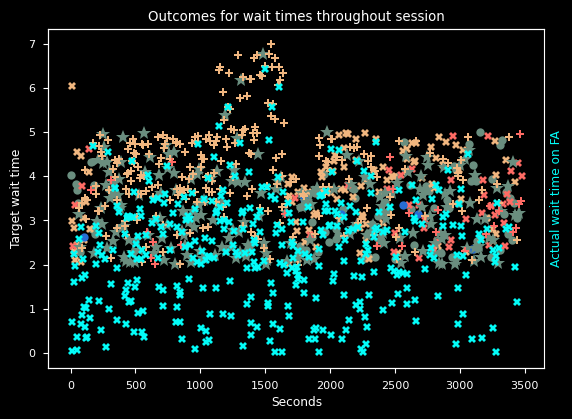

In [132]:
f, ax = plt.subplots()
plotter.plot_wait_time_vs_starttime(ax, df)

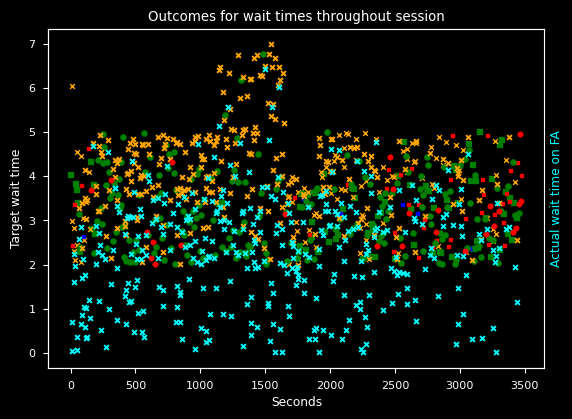

In [166]:
def plot_wait_time_vs_starttime_alltasks(ax, df):
    df = df.sort_values(by='task')
    # Loop through each unique task and plot accordingly

    for task in df['task'].unique():
        task_df = df[df['task'] == task]
        
        if task == 'gratings':
            ax.scatter(task_df[task_df['rewarded']]['trial_start_time'], task_df[task_df['rewarded']]['wait_time'], 
                       marker='s',
                       color='green',  s = 20)
            ax.scatter(task_df[task_df['false_alarm']]['trial_start_time'], task_df[task_df['false_alarm']]['wait_time'], 
                       marker='x',
                       color='orange', linewidth = 1, s = 12)
            ax.scatter(task_df[task_df['lapse']]['trial_start_time'], task_df[task_df['lapse']]['wait_time'], 
                       marker='s', 
                       color='red', s = 10)
            ax.scatter(task_df[task_df['catch_lapse']]['trial_start_time'], task_df[task_df['catch_lapse']]['wait_time'],
                       marker='s', 
                       color = 'blue',  s = 10)
        elif task == 'estim':
            ax.scatter(task_df[task_df['rewarded']]['trial_start_time'], task_df[task_df['rewarded']]['wait_time'], 
                       marker='^', color='green', s = 16)
            ax.scatter(task_df[task_df['false_alarm']]['trial_start_time'], task_df[task_df['false_alarm']]['wait_time'], 
                       marker='^', color='orange', facecolor = 'none', s = 12)
            ax.scatter(task_df[task_df['lapse']]['trial_start_time'], task_df[task_df['lapse']]['wait_time'], 
                       marker='^', color='red', facecolor = 'none', s = 16)
            
        elif task == 'moving_circle':
            ax.scatter(task_df[task_df['rewarded']]['trial_start_time'], task_df[task_df['rewarded']]['wait_time'], 
                       marker='o', color='green', s = 20)
            ax.scatter(task_df[task_df['false_alarm']]['trial_start_time'], task_df[task_df['false_alarm']]['wait_time'], 
                       marker='x', color='orange', s = 12)
            ax.scatter(task_df[task_df['lapse']]['trial_start_time'], task_df[task_df['lapse']]['wait_time'], 
                       marker='o', color='red', s = 16)

    # Adding a secondary y-axis for reaction times
    sec_ax = ax.twinx()
    ax.scatter(df[df['false_alarm']]['trial_start_time'], df[df['false_alarm']]['reaction_time'], marker = 'x', 
                color='cyan', label='false alarm reaction time', s = 12)
    sec_ax.spines['right'].set_visible(False)
    sec_ax.set_ylabel('Actual wait time on FA')
    sec_ax.yaxis.label.set_color('cyan')
    sec_ax.set_yticks([])  # Removes the y-axis ticks
    sec_ax.set_yticklabels([])  # Removes the y-axis tick labels

    ax.set_xlabel('Seconds')
    ax.set_ylabel('Target wait time')
    ax.set_title('Outcomes for wait times throughout session')
fig, ax = plt.subplots()
plot_wait_time_vs_starttime_alltasks(ax, df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


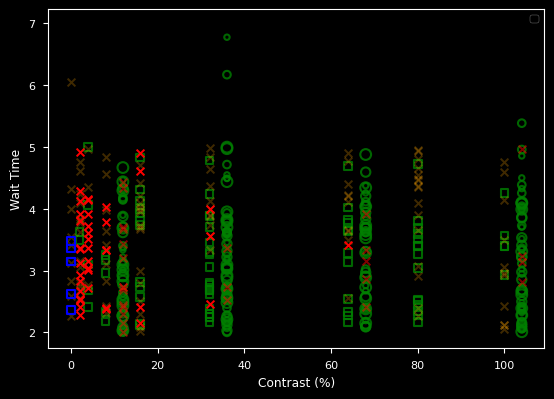

In [125]:

def plot_wait_time_vs_contrast_alltasks(ax, df):
    # Loop through each unique task and plot for different outcomes
    df = df.sort_values(by='task')


    # Loop through each unique task and plot accordingly
    for task in df['task'].unique():
        task_df = df[df['task'] == task]

        if task == 'gratings':
            rewarded_df = task_df[task_df['rewarded'] == True]
            ax.scatter(rewarded_df['contrast'], rewarded_df['wait_time'], marker='s', facecolor = 'none', color='green', linewidth = 1.5, alpha = 0.8)
            false_alarm_df = task_df[task_df['false_alarm'] == True]
            ax.scatter(false_alarm_df['contrast'], false_alarm_df['wait_time'], marker='x', color='orange', alpha = 0.25)
            catch_lapse_df = task_df[task_df['catch_lapse'] == True]
            ax.scatter(catch_lapse_df['contrast'], catch_lapse_df['wait_time'], marker='s', facecolor = 'none', color='blue', linewidth = 1.5)
            lapse_df = task_df[task_df['lapse'] == True]
            ax.scatter(lapse_df['contrast'], lapse_df['wait_time'], marker='x', color='red')

        elif task == 'estim':
            task_df['abs_estim_amp'] = np.abs(task_df['estim_amp'])
            rewarded_df = task_df[task_df['rewarded'] == True]
            ax.scatter(rewarded_df['abs_estim_amp'], rewarded_df['wait_time'], marker='s', facecolor = 'none', color='green', linewidth = 1.5)
            false_alarm_df = task_df[task_df['false_alarm'] == True]
            ax.scatter(false_alarm_df['abs_estim_amp'], false_alarm_df['wait_time'], marker='x', color='orange')
            lapse_df = task_df[task_df['lapse'] == True]
            ax.scatter(lapse_df['abs_estim_amp'], lapse_df['wait_time'], marker='x', color='red')
            ax.set_xlabel('Amplitude (uA)')
        
        elif task == 'moving_circle':    
            rewarded_df = task_df[task_df['rewarded'] == True]
            sizes = rewarded_df['circle_radius']*0.15 # Scaling factor for visibility
            ax.scatter(rewarded_df['circle_contrast']*100 + 4, rewarded_df['wait_time'], marker='o', facecolor = 'none', 
                       color='green', linewidth = 1.5, s = sizes, alpha = 0.8)
            
            false_alarm_df = task_df[task_df['false_alarm'] == True]
            sizes = false_alarm_df['circle_radius']*0.15 # Scaling factor for visibility
            ax.scatter(false_alarm_df['circle_contrast']*100+4, false_alarm_df['wait_time'], marker='x', facecolor = 'none', 
                       color='orange', linewidth = 1.5, s = sizes, alpha = 0.25)
            
            lapse_df = task_df[task_df['lapse'] == True]
            sizes = lapse_df['circle_radius']*0.15 # Scaling factor for visibility
            ax.scatter(lapse_df['circle_contrast']*100 + 4, lapse_df['wait_time'], marker='x', color='red', alpha = 0.5)

            ax.set_xlabel('Contrast (%)')

    ax.set_ylabel('Wait Time')

# Example usage:
fig, ax = plt.subplots()
plot_wait_time_vs_contrast(ax, df)



In [19]:
alpha_values

array([0.2])

c:\Users\jordan\Documents\github\mouse_behavior\plotter.py:715: RuntimeWarning: invalid value encountered in longlong_scalars
  lambda df: df['rewarded'].sum() / (df['rewarded'].sum() + df['lapse'].sum())
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(nam

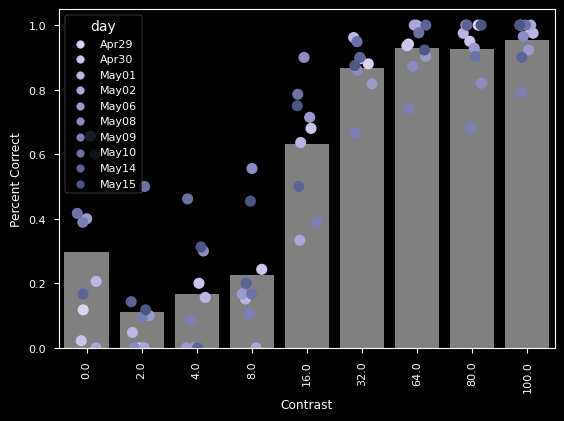

In [13]:
f, ax = plt.subplots()
